In [28]:
import pandas as pd
df = pd.read_csv('nypd-2019-2021.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [29]:
from plotnine import *

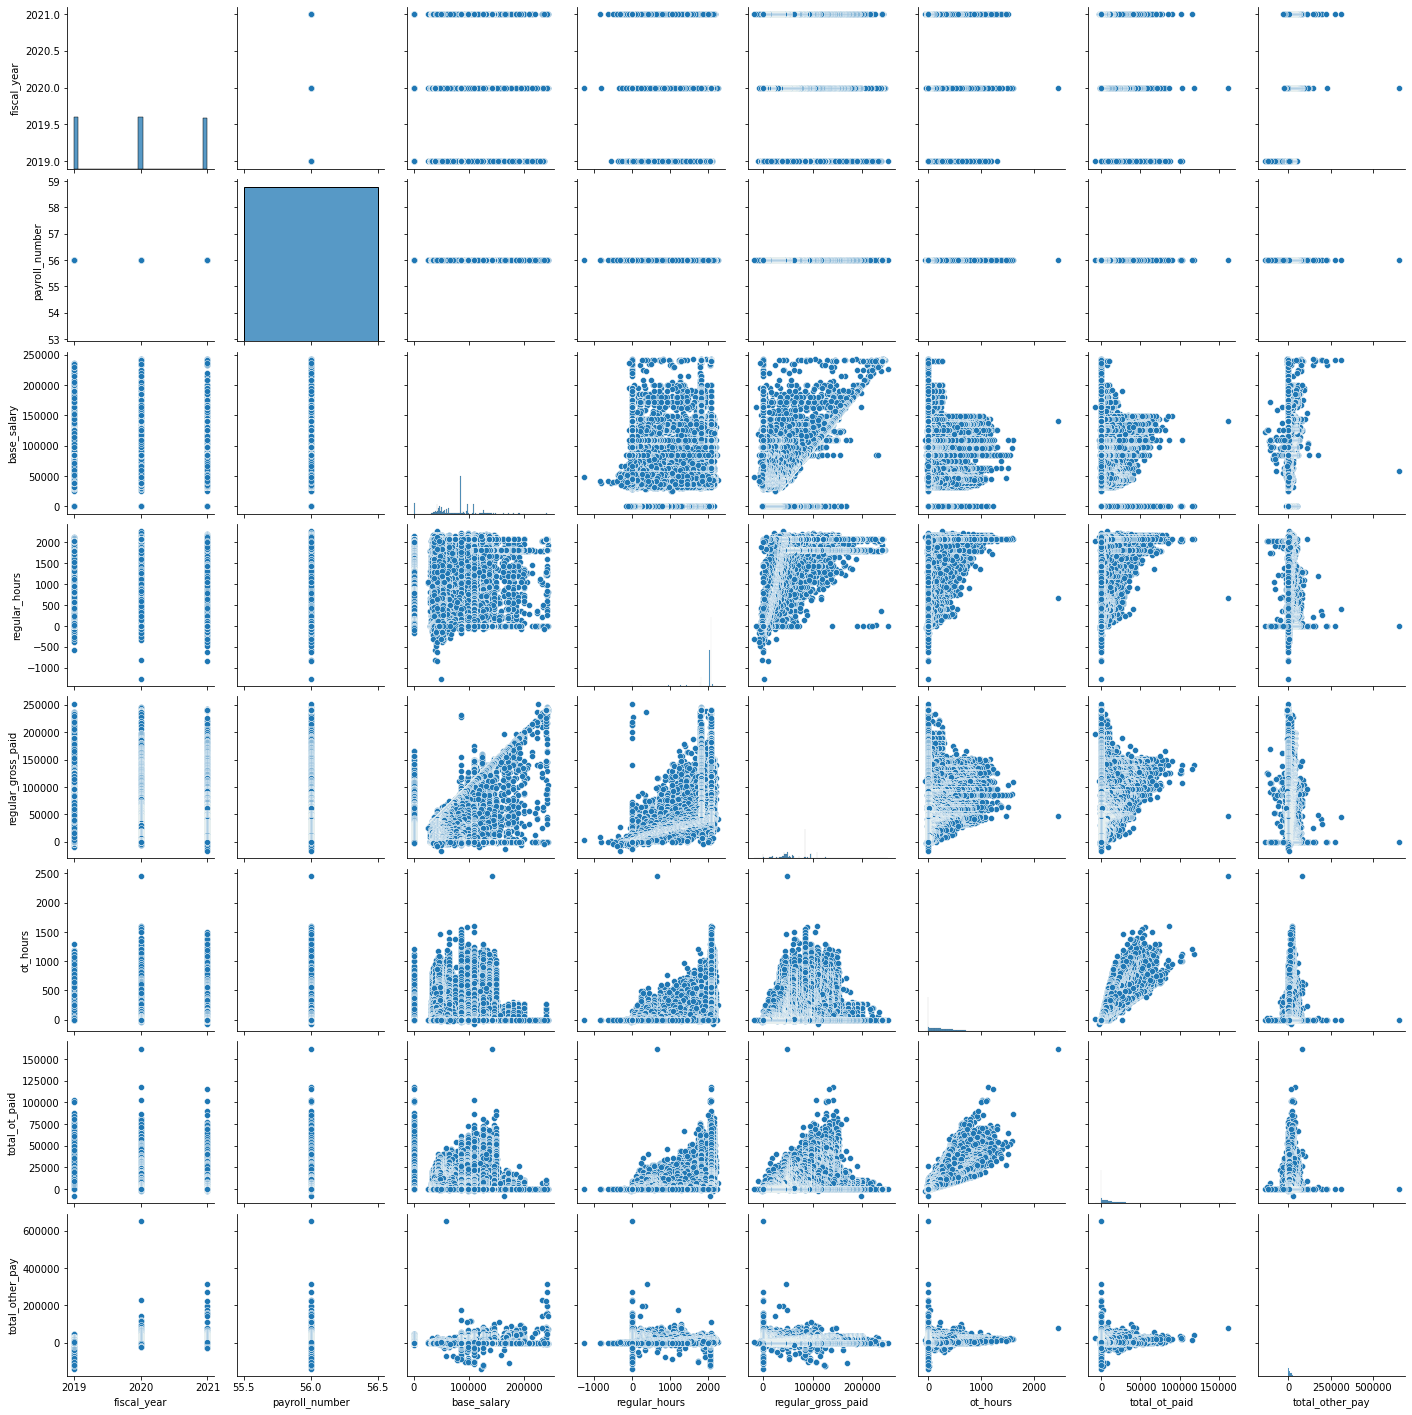

In [30]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

sns.pairplot(df)

### Important notes from the data dictionary

#### Base salary:
The amount the job pays (not necessarily what was earned) and not including any other pay (differentials, lump sums, uniform allowance, meal allowance, retroactive pay increases, settlement amounts, etc) or overtime!

#### Regular Gross Paid: 
The actual base salary during reporting period, which is the portion of the person’s annual salary paid before deductions are withheld. This does not include overtime pay or other compensation and does not reflect the after tax amount or net pay. Total gross pay is calculated by adding columns L, N and O. 

#### Leave status:
Status of employee as of the close of the relevant fiscal year: Active, Ceased, or On Leave

In [5]:
df.query('leave_status_as_of_june_30== "ACTIVE"').sort_values(by='base_salary', ascending = False).head(10)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
120310,2021,56,POLICE DEPARTMENT,SHEA,DERMOT,E,04/30/1991,MANHATTAN,COMMISSIONER,ACTIVE,"243,171.00",per Annum,"1,820.00","242,486.66",0.00,0.00,"-4,658.45"
22,2020,56,POLICE DEPARTMENT,SHEA,DERMOT,E,04/30/1991,MANHATTAN,COMMISSIONER,ACTIVE,"243,171.00",per Annum,"1,935.00","238,592.04",0.00,0.00,500.00
25,2020,56,POLICE DEPARTMENT,TUCKER,BENJAMIN,B,02/24/2014,MANHATTAN,FIRST DEPUTY COMMISSIONER,ACTIVE,"242,592.00",per Annum,"1,820.00","238,905.89",0.00,0.00,0.00
24,2020,56,POLICE DEPARTMENT,MONAHAN,TERENCE,A,01/25/1982,MANHATTAN,CAPT DET CHIEF OF DEPARTMENT,ACTIVE,"242,592.00",per Annum,"2,080.00","238,905.89",0.00,0.00,0.00
120320,2021,56,POLICE DEPARTMENT,HARRISON,RODNEY,K,06/30/1992,MANHATTAN,CAPT DET CHIEF OF DEPARTMENT,ACTIVE,"242,592.00",per Annum,"2,080.00","240,776.96",0.00,0.00,"-4,619.10"
120311,2021,56,POLICE DEPARTMENT,TUCKER,BENJAMIN,B,02/24/2014,MANHATTAN,FIRST DEPUTY COMMISSIONER,ACTIVE,"242,592.00",per Annum,"1,820.00","241,909.24",0.00,0.00,"-4,647.35"
120343,2021,56,POLICE DEPARTMENT,RYAN,KRISTINE,M,02/24/2020,MANHATTAN,ADMINISTRATIVE STAFF ANALYST,ACTIVE,"241,116.00",per Annum,"1,820.00","240,437.24",0.00,0.00,"-4,619.10"
53,2020,56,POLICE DEPARTMENT,LIPETRI,MICHAEL,J,02/28/1994,MANHATTAN,CAPTAIN DETAILED AS CHIEF OF CRIME CONTROL STR...,ACTIVE,"241,116.00",per Annum,"2,080.00","237,180.58",0.00,0.00,0.00
54,2020,56,POLICE DEPARTMENT,MORALES,MARTIN,NaN,07/11/1988,MANHATTAN,CAPTAIN DETAILED AS CHIEF OF PERSONNEL,ACTIVE,"241,116.00",per Annum,"2,080.00","237,180.58",0.00,0.00,0.00
51,2020,56,POLICE DEPARTMENT,WEDIN,HARRY,J,01/26/1981,MANHATTAN,CAPTAIN DETAILED AS CHIEF OF SPECIAL OPERATIONS,ACTIVE,"241,116.00",per Annum,"2,080.00","237,452.34",0.00,0.00,0.00


In [6]:
df.sort_values(by='base_salary', ascending = False).head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2545,2020,56,POLICE DEPARTMENT,O'NEILL,JAMES,P,04/02/1995,MANHATTAN,COMMISSIONER,CEASED,"243,171.00",per Annum,805.00,"104,600.80",0.00,0.00,"73,084.18"
120310,2021,56,POLICE DEPARTMENT,SHEA,DERMOT,E,04/30/1991,MANHATTAN,COMMISSIONER,ACTIVE,"243,171.00",per Annum,"1,820.00","242,486.66",0.00,0.00,"-4,658.45"
126149,2021,56,POLICE DEPARTMENT,O'NEILL,JAMES,P,04/02/1995,MANHATTAN,COMMISSIONER,CEASED,"243,171.00",per Annum,0.00,0.00,0.00,0.00,"144,911.90"
22,2020,56,POLICE DEPARTMENT,SHEA,DERMOT,E,04/30/1991,MANHATTAN,COMMISSIONER,ACTIVE,"243,171.00",per Annum,"1,935.00","238,592.04",0.00,0.00,500.00
25,2020,56,POLICE DEPARTMENT,TUCKER,BENJAMIN,B,02/24/2014,MANHATTAN,FIRST DEPUTY COMMISSIONER,ACTIVE,"242,592.00",per Annum,"1,820.00","238,905.89",0.00,0.00,0.00


In [7]:
df.sort_values(by='total_ot_paid', ascending = False).head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88"
1,2020,56,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","140,146.17","1,125.25","117,728.07","40,696.41"
120288,2021,56,POLICE DEPARTMENT,ANSELMI,PETER,W,06/03/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","132,288.00","1,217.50","116,052.51","13,357.38"
3,2020,56,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","140,146.17","1,007.00","103,226.97","27,980.42"
100867,2019,56,POLICE DEPARTMENT,GARCIA,FRANKLIN,A,08/31/1998,MANHATTAN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,"109,360.00",per Annum,"2,040.00","107,524.64","1,116.00","103,091.60","20,979.07"


#### Observation
📚 The highest earning ranks, by base salary are: Commissioners, deputy commissioners and department chiefs.

` Question to ask domain expert `

🚨 How to find deductions to calculate net, or take-home pay. For now, we're assuming the take home pay is regular gross plus overtime and other pay. Let's calculate that.

In [8]:
df['total_pay'] = df['regular_gross_paid'] + df['total_ot_paid'] + df['total_other_pay']

In [10]:
model = smf.ols('total_pay ~ total_ot_paid', data=df.query('leave_status_as_of_june_30== "ACTIVE"'))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_pay   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 1.844e+05
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:38:14   Log-Likelihood:            -1.8757e+06
No. Observations:              159089   AIC:                         3.751e+06
Df Residuals:                  159087   BIC:                         3.752e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        5.8e+04    113.034    513.109      0.000    5.78e+04    5.82e+04
total_ot_paid     2.7797      0.006    429.437      0.000       2.767       2.792
==============================================================================
Omnibus:                    41674.511   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145989.078
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       6.905   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 📚 Observation
About 54% variation in total pay is explained by total over time paid. Not much of a difference observed when non active duty officials are included.

In [11]:
model = smf.ols('total_pay ~ total_ot_paid', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_pay   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                 2.244e+05
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:38:14   Log-Likelihood:            -2.1201e+06
No. Observations:              179295   AIC:                         4.240e+06
Df Residuals:                  179293   BIC:                         4.240e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.188e+04    106.344    487.825      0.000    5.17e+04    5.21e+04
total_ot_paid     3.0110      0.006    473.662      0.000       2.999       3.023
==============================================================================
Omnibus:                    48502.626   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192801.992
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       7.364   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Ignoring the leave status for a second to look at all employees`

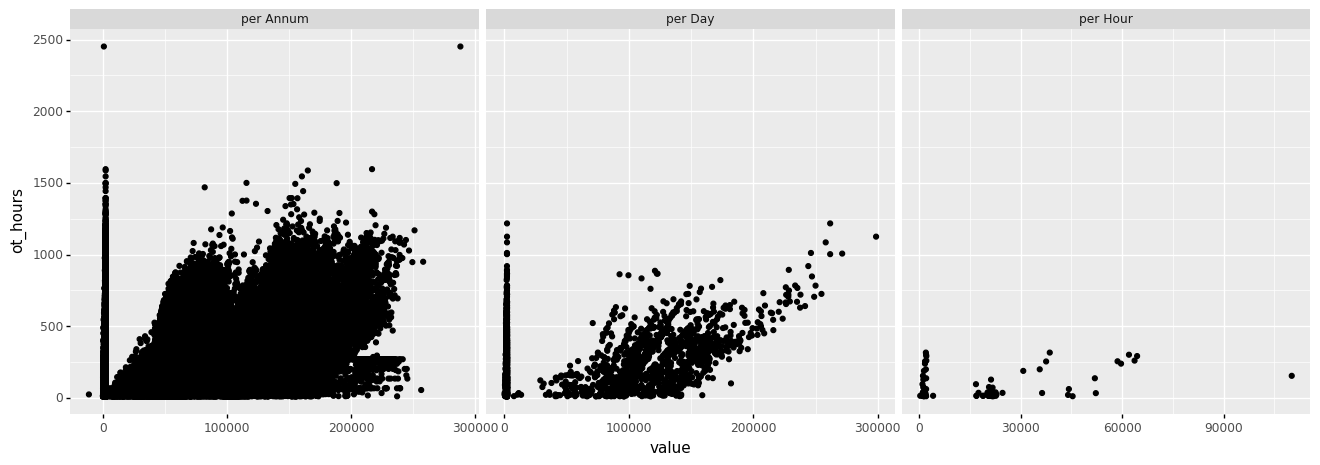

<ggplot: (378641150)>

In [12]:
to_plot = df[['pay_basis', 'regular_hours','total_pay','ot_hours']]
# to_plot = to_plot.query('pay_basis=="per Annum"')
to_plot = (to_plot.melt(id_vars = ['ot_hours', 'pay_basis']).dropna().query('ot_hours > 10'))

(
    ggplot(to_plot, aes(x='value', y='ot_hours')) + 
        geom_point() +
        facet_wrap('pay_basis', scales='free_x') + 
        theme(figure_size=(16,5))
)

In [13]:
df.query('pay_basis == "per Annum"').sort_values(by='ot_hours', ascending = False).head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88","288,142.21"
314,2020,56,POLICE DEPARTMENT,GARCIA,FRANKLIN,A,08/31/1998,MANHATTAN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,"109,360.00",per Annum,"2,080.00","108,768.97","1,596.00","86,540.76","21,580.05","216,889.78"
4105,2020,56,POLICE DEPARTMENT,JUBRAJ,ROBERT,P,07/07/1999,QUEENS,P.O. DET SPEC,ACTIVE,"96,302.00",per Annum,"2,111.92","87,998.48","1,586.75","55,373.45","21,722.85","165,094.78"
4761,2020,56,POLICE DEPARTMENT,DIAZ,PEDRO,NaN,07/07/1999,BROOKLYN,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","84,831.14","1,545.50","51,553.93","23,962.39","160,347.46"
136505,2021,56,POLICE DEPARTMENT,ZERELLA,JOSEPH,T,01/06/2016,BROOKLYN,POLICE OFFICER,ACTIVE,"63,125.00",per Annum,"2,080.00","62,794.50","1,500.25","39,891.27","12,966.65","115,652.42"


In [14]:
df.sort_values(by='ot_hours', ascending = False).head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88","288,142.21"
314,2020,56,POLICE DEPARTMENT,GARCIA,FRANKLIN,A,08/31/1998,MANHATTAN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,"109,360.00",per Annum,"2,080.00","108,768.97","1,596.00","86,540.76","21,580.05","216,889.78"
4105,2020,56,POLICE DEPARTMENT,JUBRAJ,ROBERT,P,07/07/1999,QUEENS,P.O. DET SPEC,ACTIVE,"96,302.00",per Annum,"2,111.92","87,998.48","1,586.75","55,373.45","21,722.85","165,094.78"
4761,2020,56,POLICE DEPARTMENT,DIAZ,PEDRO,NaN,07/07/1999,BROOKLYN,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","84,831.14","1,545.50","51,553.93","23,962.39","160,347.46"
136505,2021,56,POLICE DEPARTMENT,ZERELLA,JOSEPH,T,01/06/2016,BROOKLYN,POLICE OFFICER,ACTIVE,"63,125.00",per Annum,"2,080.00","62,794.50","1,500.25","39,891.27","12,966.65","115,652.42"


In [31]:
df.ot_hours.max()

2451.57

In [32]:
df.ot_hours.min()

-66.05

In [33]:
df['hours_diff'] = df['ot_hours'] - df['regular_hours']

In [35]:
df.sort_values(by='hours_diff', ascending = False).head(10)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,hours_diff
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88","1,786.39"
58566,2020,56,POLICE DEPARTMENT,WILLIAMS,WAYNE,D,08/08/1996,MANHATTAN,ASSOCIATE TRAFFIC ENFORCEMENT AGENT,CEASED,"48,193.00",per Annum,"-1,260.00","2,684.45",0.00,1.16,155.86,"1,260.00"
176087,2021,56,POLICE DEPARTMENT,CLOWERY,MARIAN,T,02/26/1998,MANHATTAN,POLICE ADMINISTRATIVE AIDE,CEASED,"41,970.00",per Annum,-840.00,"9,635.35",0.00,0.00,597.43,840.00
60189,2020,56,POLICE DEPARTMENT,BRUTUS,BRANDON,C,09/27/2012,MANHATTAN,TRAFFIC ENFORCEMENT AGENT,CEASED,"38,467.00",per Annum,-808.00,-686.39,0.00,0.00,686.39,808.00
179186,2021,56,POLICE DEPARTMENT,ALAM,NAFISA,NaN,04/27/2018,MANHATTAN,TRAFFIC ENFORCEMENT AGENT,CEASED,"42,377.00",per Annum,-624.00,-160.65,0.00,0.00,-1.43,624.00
71802,2019,56,POLICE DEPARTMENT,HICKS,CASSHAE,M,03/31/2016,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ON LEAVE,"38,625.00",per Annum,-566.00,"1,287.48",0.00,129.49,47.10,566.00
179286,2021,56,POLICE DEPARTMENT,LAMBERSON,ALEXANDRIA,M,02/28/2019,MANHATTAN,POLICE COMMUNICATIONS TECHNICIAN,ON LEAVE,"40,636.00",per Annum,-490.00,"-4,655.62",0.00,0.00,-92.59,490.00
179230,2021,56,POLICE DEPARTMENT,WELCH,RAQUEL,L,03/31/2020,MANHATTAN,POLICE COMMUNICATIONS TECHNICIAN,CEASED,"39,329.00",per Annum,-438.00,-986.65,0.00,0.00,84.05,438.00
179117,2021,56,POLICE DEPARTMENT,STEWART,SHERRY,A,06/28/1993,MANHATTAN,POLICE ADMINISTRATIVE AIDE,CEASED,"41,970.00",per Annum,-392.00,-520.90,0.00,0.00,520.90,392.00
179288,2021,56,POLICE DEPARTMENT,FLORES,VICTOR,NaN,03/09/2020,MANHATTAN,TRAFFIC ENFORCEMENT AGENT,CEASED,"41,493.00",per Annum,-385.35,"-7,618.46",0.00,0.00,0.00,385.35


In [16]:
model = smf.ols('total_ot_paid ~ regular_gross_paid', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_ot_paid   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 9.271e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:38:40   Log-Likelihood:            -1.9053e+06
No. Observations:              179295   AIC:                         3.811e+06
Df Residuals:                  179293   BIC:                         3.811e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1826.4428     49.294    -37.052      0.000   -1923.057   -1729.828
regular_gross_paid     0.2044      0.001    304.486      0.000       0.203       0.206
==============================================================================
Omnibus:                    10876.902   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39739.238
Skew:                           0.218   Prob(JB):                         0.00
Kurtosis:                       5.265   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df.sort_values(by='total_ot_paid', ascending = False).head(10)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay,hours_diff
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88","288,142.21","1,786.39"
1,2020,56,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","140,146.17","1,125.25","117,728.07","40,696.41","298,570.65",-954.75
120288,2021,56,POLICE DEPARTMENT,ANSELMI,PETER,W,06/03/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","132,288.00","1,217.50","116,052.51","13,357.38","261,697.89",-862.50
3,2020,56,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","140,146.17","1,007.00","103,226.97","27,980.42","271,353.56","-1,073.00"
100867,2019,56,POLICE DEPARTMENT,GARCIA,FRANKLIN,A,08/31/1998,MANHATTAN,POLICE OFFICER D/A DETECTIVE 2ND GR,ACTIVE,"109,360.00",per Annum,"2,040.00","107,524.64","1,116.00","103,091.60","20,979.07","231,595.31",-924.00
120290,2021,56,POLICE DEPARTMENT,ORTEGA,MANUEL,G,02/12/2018,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","131,779.20","1,085.25","102,184.53","24,136.67","258,100.40",-994.75
71598,2019,56,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,486.72,per Day,"2,040.00","126,547.20","1,011.50","101,740.00","17,963.45","246,250.65","-1,028.50"
116005,2019,56,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,486.72,per Day,"2,040.00","126,547.20","1,003.00","100,332.68","34,802.95","261,682.83","-1,037.00"
120289,2021,56,POLICE DEPARTMENT,CHENG,CHRISTOPHER,C,06/30/1998,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"149,068.00",per Annum,"2,080.00","147,066.63",950.08,"90,551.25","20,495.26","258,113.14","-1,129.92"
92588,2019,56,POLICE DEPARTMENT,RYAN,KERRY,M,07/28/2003,MANHATTAN,STATIONARY ENGINEER,ACTIVE,486.72,per Day,"2,040.00","126,547.20",893.50,"87,938.10","13,962.23","228,447.53","-1,146.50"


In [18]:
df.hours_diff.median()

-1732.18

In [19]:
df.describe()

,fiscal_year,payroll_number,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay,hours_diff
count,"179,295.00","179,295.00","179,295.00","179,295.00","179,295.00","179,295.00","179,295.00","179,295.00","179,295.00","179,295.00"
mean,"2,019.99",56.00,"69,742.01","1,788.32","64,526.56",224.14,"11,359.59","10,194.99","86,081.14","-1,564.18"
std,0.81,0.00,"34,297.50",565.72,"35,086.33",219.24,"12,281.00","8,632.80","49,599.56",508.26
min,"2,019.00",56.00,12.14,"-1,260.00","-16,883.58",-66.05,"-8,171.78","-138,055.57","-137,960.51","-2,234.28"
25%,"2,019.00",56.00,"45,000.00","1,820.00","42,270.23",21.50,874.09,"2,183.04","50,191.47","-1,889.67"
50%,"2,020.00",56.00,"66,625.00","2,040.00","60,060.02",171.92,"7,200.18","8,764.87","77,432.69","-1,732.18"
75%,"2,021.00",56.00,"85,292.00","2,080.00","85,058.23",365.75,"17,993.56","17,081.77","123,568.01","-1,459.24"
max,"2,021.00",56.00,"243,171.00","2,262.47","251,811.46","2,451.57","162,000.47","650,000.00","650,000.00","1,786.39"


In [20]:
df.hours_diff.mean()

-1564.1784637050673

In [21]:
df.query('last_name == "MURTHA"').query('first_name == "KEVIN"')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay,hours_diff
2,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88","288,142.21","1,786.39"
12937,2020,56,POLICE DEPARTMENT,MURTHA,KEVIN,C,01/31/2006,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","84,831.14",495.25,"27,694.04","19,880.59","132,405.77","-1,584.75"
107579,2019,56,POLICE DEPARTMENT,MURTHA,KEVIN,C,01/31/2006,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,040.00","85,058.23",258.58,"21,586.78","17,387.26","124,032.27","-1,781.42"
116465,2019,56,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"138,089.00",per Annum,"2,040.00","137,710.56",387.87,"57,280.57","25,084.00","220,075.13","-1,652.13"
129586,2021,56,POLICE DEPARTMENT,MURTHA,KEVIN,C,01/31/2006,BRONX,POLICE OFFICER,ACTIVE,"85,292.00",per Annum,"2,080.00","85,051.84",603.17,"28,245.39","19,844.18","133,141.41","-1,476.83"


In [22]:
total_gross = df.regular_gross_paid.sum()
total_ot = df.total_ot_paid.sum()

In [23]:
df.ot_hours.mean().round()

224.0

In [24]:
kevin_df = pd.read_csv('kevin_murtha.csv')
kevin_df.columns = kevin_df.columns.str.replace(" ", "_")
kevin_df.columns = kevin_df.columns.str.replace("-", "_")
kevin_df.columns = kevin_df.columns.str.lower()

In [25]:
kevin_df

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88"
1,2016,NaN,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"122,750.00",per Annum,"2,091.42","119,762.52",453.53,"43,342.25","24,975.58"
2,2015,NaN,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"119,388.00",per Annum,"2,085.72","121,296.29",451.27,"47,199.15","21,177.23"
3,2014,NaN,Police Department,MURTHA,KEVIN,NaN,04/30/1995,NaN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"113,554.00",per Annum,"2,085.72","112,891.25",419.93,"40,223.91","20,751.22"
4,2017,NaN,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"134,067.00",per Annum,"2,051.43","132,640.94",433.70,"50,799.80","28,006.50"
5,2018,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"138,089.00",per Annum,"2,045.72","134,294.80",536.33,"62,473.98","27,815.30"
6,2019,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,04/30/1995,BROOKLYN,LIEUTENANT D/A SPECIAL ASSIGNMENT,ACTIVE,"138,089.00",per Annum,"2,040.00","137,710.56",387.87,"57,280.57","25,084.00"


In [26]:
kevin_df.ot_hours.mean().round(2)

733.46

In [27]:
kevin_df.regular_hours.mean().round(2)

1866.46

A lot more possibilities here, but essentially, the idea is to look at how one cop Kevin Murtha made more than anyone else (and that too by an almost $44,000 difference with the next highest paid employee) in overtime. And, after he made so much money, did he retire or was he laid off? Who is Kevin Murtha?

# Reporting plan ~ tentative

`Questions to ask:`

1. Is it normal for one cop to make so much more than others?
2. What factors could potentially lead to him making so much more?
3. For some PDs, retirement salary is based on final year's pay — did Kevin Murtha then game the system to make extra money in overtime to be able to make higher in retirement?